In [1]:
import gym
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# desc = ["SFFF", "FFFH", "FFFF", "FFFG"]

desc = None

env = gym.make('FrozenLake-v1', desc = desc, map_name="8x8", is_slippery=False)
size = 8
obs = env.reset()

In [3]:

state_matrix = np.array([i for i in range(size**2)]).reshape((size, size))
state_matrix = np.pad(state_matrix, pad_width = 1, mode = 'edge')

def neighbours(pres_state):

    row = (pres_state // size) + 1
    col = (pres_state % size) + 1

    up = state_matrix[row - 1][col]
    down = state_matrix[row + 1][col]

    left = state_matrix[row][col - 1]
    right = state_matrix[row][col + 1]

    return [left, down, right, up]

In [4]:
alpha = 0.1
episodes = 10000
n = 5
discount = 0.9
epsilon = 0.2

V_S = {}
for s in range(size**2):
    V_S[s] = 1

Pi = {}
for s in range(size**2):
    Pi[s] = np.random.randint(0, 4)

Initial_Pi = Pi.copy()


for e in range(episodes):

    obs = env.reset()

    S = [obs]
    R = [0]

    T = 1e6
    t = 0

    while True:

        if t < T:

            if np.random.rand() < epsilon:
                action = np.random.randint(0, 4)
            else:
                action = Pi[obs]
            
            obs, reward, done, info = env.step(action)
            
            S.append(obs)
            R.append(reward)

            if done:
                if reward != 1:
                    V_S[int(obs)] = -1

                T = t + 1

        tow = t - n + 1

        if tow >= 0:
            G = sum([(discount ** (i - tow - 1)) * R[i] for i in range(int(tow + 1), int(min(tow + n + 1, T + 1)))])

            if tow + n < T:
                G += (discount ** n) * V_S[S[tow + n]]

            V_S[S[tow]] += alpha * (G - V_S[S[tow]])

            [l, d, r, u] = neighbours(S[tow])
            Pi[S[tow]] = np.argmax([V_S[l], V_S[d], V_S[r], V_S[u]])

        t += 1

        if tow == T - 1:
            break

    if e % 100 == 0:
        print(e, ' - ', sum(R), 'ended at ', S[-1], ' after taking ', len(R) - 1, ' steps.')

0  -  0.0 ended at  41  after taking  39  steps.
100  -  1.0 ended at  63  after taking  14  steps.
200  -  0.0 ended at  54  after taking  17  steps.
300  -  0.0 ended at  54  after taking  18  steps.
400  -  1.0 ended at  63  after taking  16  steps.
500  -  1.0 ended at  63  after taking  19  steps.
600  -  0.0 ended at  29  after taking  8  steps.
700  -  1.0 ended at  63  after taking  31  steps.
800  -  1.0 ended at  63  after taking  18  steps.
900  -  0.0 ended at  29  after taking  13  steps.
1000  -  1.0 ended at  63  after taking  15  steps.
1100  -  1.0 ended at  63  after taking  20  steps.
1200  -  1.0 ended at  63  after taking  18  steps.
1300  -  1.0 ended at  63  after taking  25  steps.
1400  -  1.0 ended at  63  after taking  16  steps.
1500  -  1.0 ended at  63  after taking  19  steps.
1600  -  1.0 ended at  63  after taking  20  steps.
1700  -  0.0 ended at  54  after taking  14  steps.
1800  -  1.0 ended at  63  after taking  18  steps.
1900  -  1.0 ended at  63

In [5]:
s = 0
arrows = ['←', '↓', '→', '↑']

for r in range(size):
    for c in range(size):
        print(arrows[Pi[s]], end = " ")
        s += 1
    
    print()
    


→ → → ↓ ↓ ↓ ↓ ↓ 
→ → → → → → ↓ ↓ 
↑ ↑ ↑ ↑ → → → ↓ 
↓ ↑ → → ↓ ↑ → ↓ 
↓ ← ↑ ↓ → ↓ → ↓ 
↓ ↑ ← → → ↓ ↓ ↓ 
↓ → → ↑ ↑ ↓ ← ↓ 
→ → ↑ ↑ → → → → 


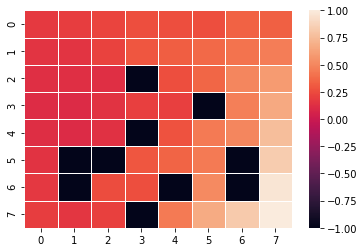

In [6]:
state_values = np.array([V_S[i] for i in range(size**2)]).reshape((size, size))
ax = sns.heatmap(state_values, linewidth=0.5)
plt.show()

![](2022-06-29-20-02-59.png)